<a href="https://colab.research.google.com/github/Aditya1026-05/Crypto-Currency-Price-Predictor-LSTM/blob/main/CryptoCurrency_Price_Prediction_%3E_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [37]:
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start = start, end = end)

/tmp/ipython-input-995627237.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start = start, end = end)
[*********************100%***********************]  1 of 1 completed


In [38]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [39]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2026-02-08,70264.726562,72206.906250,68852.898438,69283.726562,39721722619
2026-02-09,70120.781250,71369.968750,68291.031250,70243.328125,52081598792
2026-02-10,68793.960938,70464.265625,67913.093750,70137.390625,40593063077
2026-02-11,66991.968750,69242.679688,65757.304688,68791.859375,49671946030
2026-02-12,67934.726562,68182.562500,66652.453125,67025.554688,47325425664


In [40]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,4167.0,2.744850e+04,3.204561e+04,1.781030e+02,2.780955e+03,1.095100e+04,4.290118e+04,1.247525e+05
High,BTC-USD,4167.0,2.798062e+04,3.258407e+04,2.117310e+02,2.879500e+03,1.129822e+04,4.375459e+04,1.261981e+05
Low,BTC-USD,4167.0,2.684716e+04,3.145333e+04,1.715100e+02,2.685375e+03,1.063980e+04,4.210027e+04,1.231960e+05
Open,BTC-USD,4167.0,2.743332e+04,3.204289e+04,1.768970e+02,2.760370e+03,1.095182e+04,4.291581e+04,1.247521e+05
Volume,BTC-USD,4167.0,2.190024e+10,2.303543e+10,5.914570e+06,1.376480e+09,1.722107e+10,3.370175e+10,3.509679e+11


In [41]:
stock_data.shape

(4167, 5)

In [42]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4167 entries, 2014-09-17 to 2026-02-12
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   4167 non-null   float64
 1   (High, BTC-USD)    4167 non-null   float64
 2   (Low, BTC-USD)     4167 non-null   float64
 3   (Open, BTC-USD)    4167 non-null   float64
 4   (Volume, BTC-USD)  4167 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 195.3 KB


In [43]:
#Close price data
closing_price = stock_data[['Close']]
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2026-02-08,70264.726562
2026-02-09,70120.781250


Text(0, 0.5, 'Closing Price USD ($)')

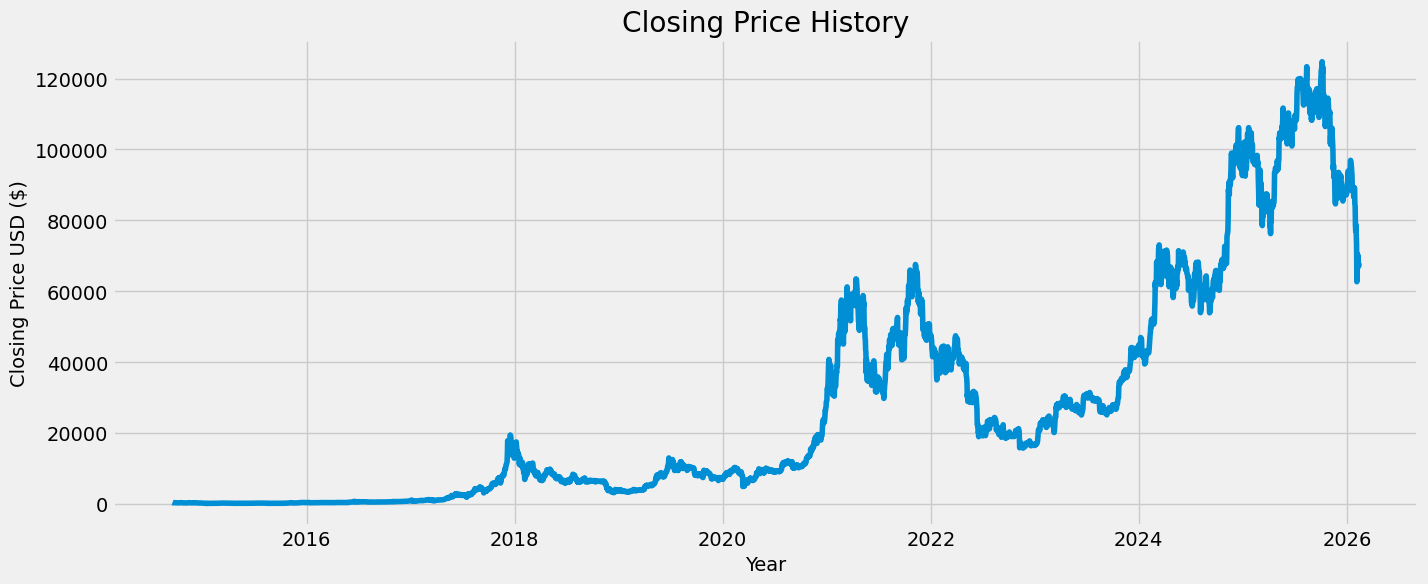

In [44]:
#Plot closing price with enhacement
plt.figure(figsize = (15,6))
plt.title('Closing Price History')
plt.plot(closing_price.index,closing_price['Close'])
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Closing Price USD ($)', fontsize = 14)

In [45]:
# Moving average : helps to reduce noise(removes short term fluctuations) and helps model focus on long term patterns.

temp_data = [10,20,30,40,50,60,70,80]

df1 = pd.DataFrame(temp_data)


In [46]:
df1.rolling(3).mean()

,0
0,NaN
1,NaN
2,20.0
3,30.0
4,40.0
5,50.0
6,60.0
7,70.0


In [47]:
for i in range(2014,2026):
  print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366
2025 365


In [48]:
#Moving average for 365 days and 100 days

closing_price['MA_365'] = closing_price['Close'].rolling(365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(100).mean()
closing_price

/tmp/ipython-input-2211337196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(365).mean()
/tmp/ipython-input-2211337196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(100).mean()


Price,Close,MA_365,MA_100
Ticker,BTC-USD,,
Date,,,
2014-09-17,457.334015,NaN,NaN
2014-09-18,424.440002,NaN,NaN
2014-09-19,394.795990,NaN,NaN
2014-09-20,408.903992,NaN,NaN
2014-09-21,398.821014,NaN,NaN
...,...,...,...
2026-02-08,70264.726562,100266.246265,90263.749648
2026-02-09,70120.781250,100193.974176,89864.317305


In [49]:
closing_price.tail()

Price,Close,MA_365,MA_100
Ticker,BTC-USD,,
Date,,,
2026-02-08,70264.726562,100266.246265,90263.749648
2026-02-09,70120.781250,100193.974176,89864.317305
2026-02-10,68793.960938,100115.498577,89445.860664
2026-02-11,66991.968750,100036.716492,89050.305117
2026-02-12,67934.726562,99954.658594,88713.747148


In [50]:
closing_price.shape

(4167, 3)

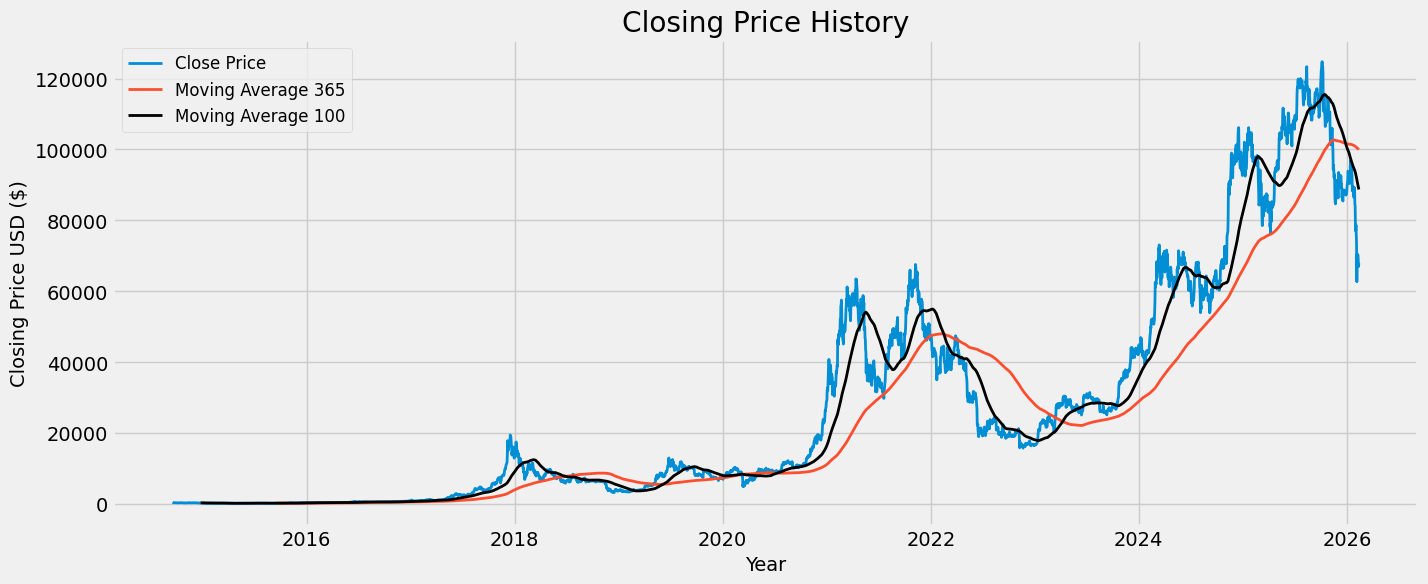

In [51]:
#Plot closing price with enhacement
plt.figure(figsize = (15,6))
plt.title('Closing Price History')
plt.plot(closing_price.index,closing_price['Close'],label = 'Close Price',linewidth=2)
plt.plot(closing_price.index,closing_price['MA_365'],label = 'Moving Average 365',linewidth=2)
plt.plot(closing_price.index,closing_price['MA_100'],label = 'Moving Average 100',color = 'black',linewidth=2)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Closing Price USD ($)', fontsize = 14)
plt.legend(fontsize =12)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [53]:
scaled_data

array([[0.00224148],
       [0.00197743],
       [0.00173947],
       ...,
       [0.55080211],
       [0.53633692],
       [0.54390475]])

In [54]:
len(scaled_data)

4167

In [55]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [56]:
#Prepare data for lstm
x_data = []
y_data = []
base_days = 100
for i in range(base_days,len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i])
  y_data.append(scaled_data[i])

x_data = np.array(x_data)
y_data = np.array(y_data)

In [57]:
x_data

array([[[0.00224148],
        [0.00197743],
        [0.00173947],
        ...,
        [0.00125603],
        [0.0011594 ],
        [0.00113109]],

       [[0.00197743],
        [0.00173947],
        [0.00185272],
        ...,
        [0.0011594 ],
        [0.00113109],
        [0.00120266]],

       [[0.00173947],
        [0.00185272],
        [0.00177178],
        ...,
        [0.00113109],
        [0.00120266],
        [0.00110585]],

       ...,

       [[0.88671105],
        [0.8538624 ],
        [0.81407093],
        ...,
        [0.55471951],
        [0.56260843],
        [0.56145293]],

       [[0.8538624 ],
        [0.81407093],
        [0.83254432],
        ...,
        [0.56260843],
        [0.56145293],
        [0.55080211]],

       [[0.81407093],
        [0.83254432],
        [0.81174915],
        ...,
        [0.56145293],
        [0.55080211],
        [0.53633692]]])

In [58]:
y_data

array([[0.00120266],
       [0.00110585],
       [0.00111689],
       ...,
       [0.55080211],
       [0.53633692],
       [0.54390475]])

In [59]:
train_size = int(len(scaled_data)*0.90)
x_train , y_train = x_data[:train_size],y_data[:train_size]
x_test , y_test = x_data[train_size:],y_data[train_size:]

In [60]:
model = Sequential([
    LSTM(128,return_sequences = True,input_shape = (x_train.shape[1],1)),
    LSTM(64,return_sequences = False),
    Dense(25),
    Dense(1)
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(x_train,y_train,batch_size = 5,epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0015
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 2.9662e-04
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 2.7503e-04
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.7064e-04
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.5103e-04
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.7510e-04
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.3995e-04
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 1.0931e-04
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.4582e-04
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 1.3494e-04


In [63]:
predictions = model.predict(x_test)
inverse_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [64]:
inverse_predictions

array([[ 85219.89 ],
       [ 82053.305],
       [ 82919.13 ],
       [ 83688.01 ],
       [ 83245.29 ],
       [ 77539.07 ],
       [ 79103.414],
       [ 75942.81 ],
       [ 82969.92 ],
       [ 79332.02 ],
       [ 83540.664],
       [ 85245.7  ],
       [ 83250.64 ],
       [ 84265.945],
       [ 83247.37 ],
       [ 83725.945],
       [ 84649.74 ],
       [ 84090.31 ],
       [ 84790.164],
       [ 84858.445],
       [ 87392.65 ],
       [ 93607.38 ],
       [ 93165.85 ],
       [ 93289.375],
       [ 94076.1  ],
       [ 93900.695],
       [ 92941.234],
       [ 94433.57 ],
       [ 93550.11 ],
       [ 93568.48 ],
       [ 96121.875],
       [ 96294.87 ],
       [ 95091.47 ],
       [ 93483.   ],
       [ 94194.516],
       [ 96445.625],
       [ 96433.32 ],
       [103233.06 ],
       [102006.22 ],
       [103886.16 ],
       [102932.48 ],
       [101583.445],
       [103325.26 ],
       [102448.8  ],
       [102798.49 ],
       [102501.73 ],
       [102226.83 ],
       [10591

In [65]:
inv_y_test

array([[ 82485.7109375 ],
       [ 83102.828125  ],
       [ 83843.8046875 ],
       [ 83504.796875  ],
       [ 78214.484375  ],
       [ 79235.3359375 ],
       [ 76271.953125  ],
       [ 82573.953125  ],
       [ 79626.140625  ],
       [ 83404.8359375 ],
       [ 85287.109375  ],
       [ 83684.9765625 ],
       [ 84542.390625  ],
       [ 83668.9921875 ],
       [ 84033.8671875 ],
       [ 84895.75      ],
       [ 84450.8046875 ],
       [ 85063.4140625 ],
       [ 85174.3046875 ],
       [ 87518.90625   ],
       [ 93441.890625  ],
       [ 93699.109375  ],
       [ 93943.796875  ],
       [ 94720.5       ],
       [ 94646.9296875 ],
       [ 93754.84375   ],
       [ 94978.75      ],
       [ 94284.7890625 ],
       [ 94207.3125    ],
       [ 96492.3359375 ],
       [ 96910.0703125 ],
       [ 95891.796875  ],
       [ 94315.9765625 ],
       [ 94748.0546875 ],
       [ 96802.4765625 ],
       [ 97032.3203125 ],
       [103241.4609375 ],
       [102970.8515625 ],
       [1046

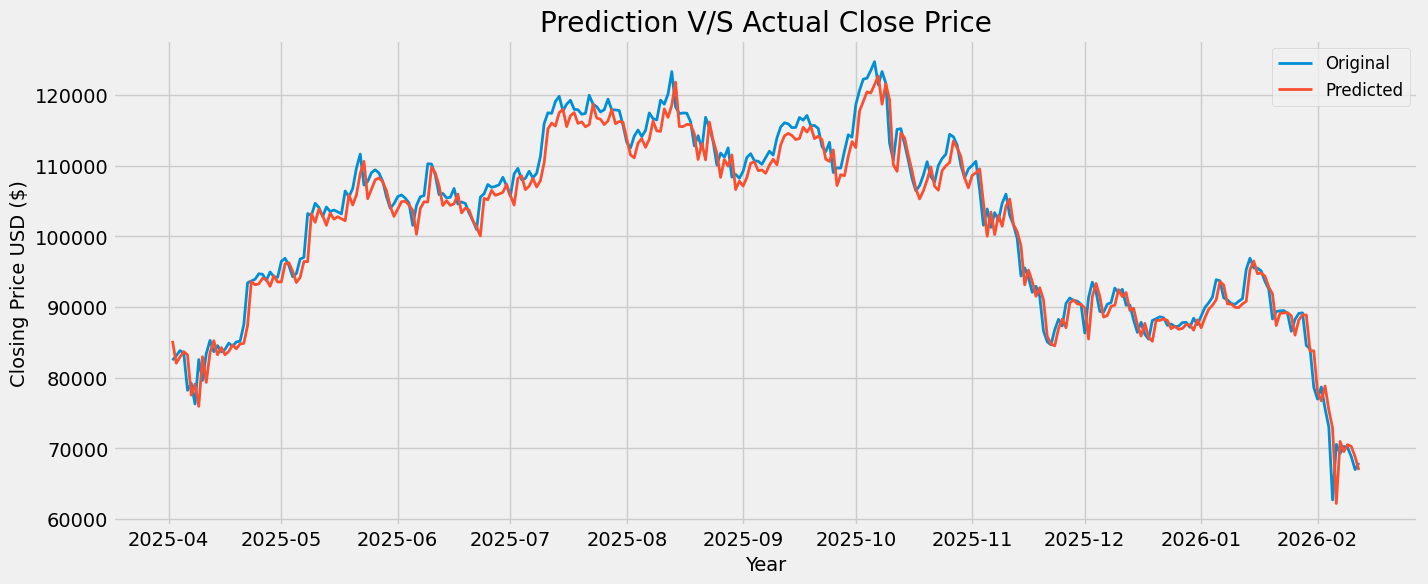

In [66]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Predicted': inverse_predictions.flatten()
    },index = closing_price.index[train_size+base_days:]
)

#Plot closing price with enhacement
plt.figure(figsize = (15,6))
plt.title('Prediction V/S Actual Close Price')
plt.plot(plotting_data.index,plotting_data['Original'],label = 'Original',linewidth=2)
plt.plot(plotting_data.index,plotting_data['Predicted'],label = 'Predicted',linewidth=2)

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Closing Price USD ($)', fontsize = 14)
plt.legend(fontsize =12)

In [67]:
#Predict Future Days
last_100 = scaled_data[300:].reshape(1,-1,1)
future_predictions = []

for _ in range(10):
  next_days = model.predict(last_100)
  future_predictions.append(scaler.inverse_transform(next_days))
  last_100 = np.append(last_100[: , 1: , :],next_days.reshape(1,1,-1),axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [68]:
future_predictions

[array([[67988.734]], dtype=float32),
 array([[68033.484]], dtype=float32),
 array([[68057.83]], dtype=float32),
 array([[68058.78]], dtype=float32),
 array([[68038.47]], dtype=float32),
 array([[68000.56]], dtype=float32),
 array([[67948.98]], dtype=float32),
 array([[67887.27]], dtype=float32),
 array([[67818.37]], dtype=float32),
 array([[67744.55]], dtype=float32)]

In [69]:
future_predictions = np.array(future_predictions).flatten()
future_predictions

array([67988.734, 68033.484, 68057.83 , 68058.78 , 68038.47 , 68000.56 ,
       67948.98 , 67887.27 , 67818.37 , 67744.55 ], dtype=float32)

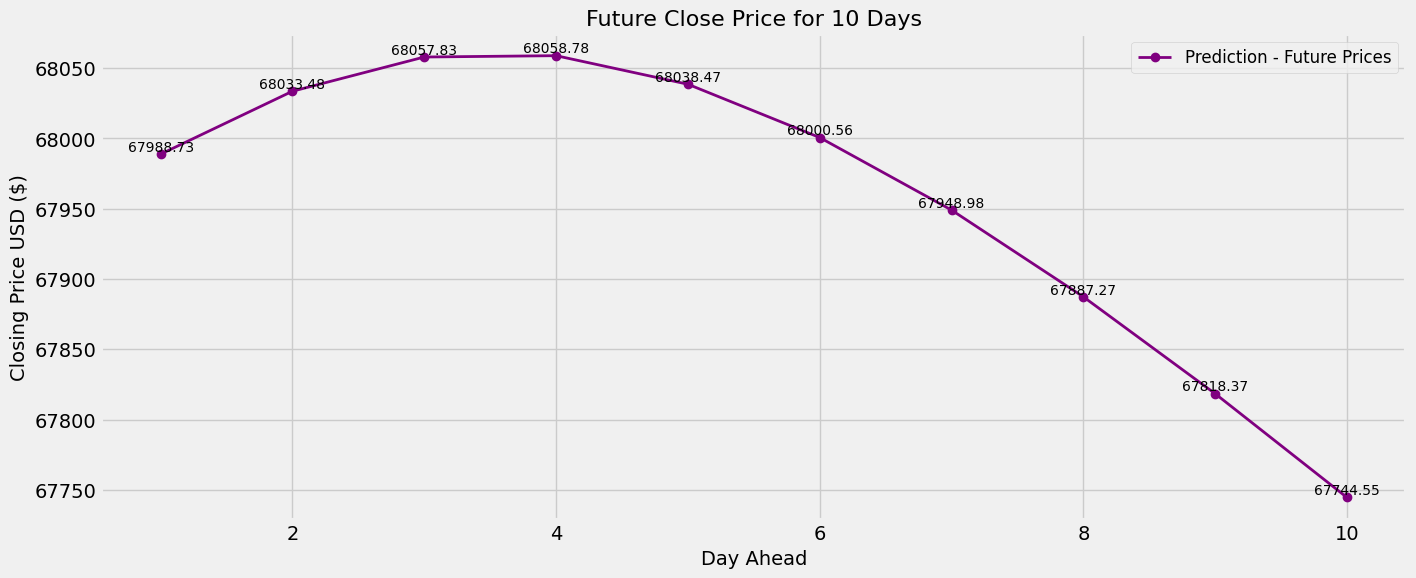

In [70]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15,6))
plt.plot(range(1,11),future_predictions,marker="o" , label = 'Prediction - Future Prices', color = 'purple',linewidth = 2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val , f'{val:.2f}', fontsize=10, ha = 'center', va='bottom',color='black')
plt.title('Future Close Price for 10 Days',fontsize = 16)

plt.xlabel('Day Ahead', fontsize = 14)
plt.ylabel('Closing Price USD ($)', fontsize = 14)
plt.legend(fontsize =12)
plt.show()

In [71]:
model.save("model.keras")

In [74]:
predictions = model.predict(x_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [75]:
predictions

array([[0.6826585 ],
       [0.65723926],
       [0.6641895 ],
       [0.6703616 ],
       [0.6668077 ],
       [0.621002  ],
       [0.6335595 ],
       [0.60818833],
       [0.6645972 ],
       [0.63539463],
       [0.6691788 ],
       [0.6828657 ],
       [0.6668507 ],
       [0.67500085],
       [0.6668244 ],
       [0.6706661 ],
       [0.6780817 ],
       [0.67359096],
       [0.67920893],
       [0.67975706],
       [0.70009995],
       [0.74998766],
       [0.74644333],
       [0.7474349 ],
       [0.7537502 ],
       [0.75234216],
       [0.74464023],
       [0.75661975],
       [0.7495279 ],
       [0.74967533],
       [0.7701723 ],
       [0.77156097],
       [0.7619009 ],
       [0.74898916],
       [0.7547007 ],
       [0.7727711 ],
       [0.77267236],
       [0.82725614],
       [0.81740785],
       [0.8324987 ],
       [0.8248432 ],
       [0.81401414],
       [0.82799625],
       [0.8209606 ],
       [0.8237677 ],
       [0.82138544],
       [0.81917876],
       [0.848

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = inverse_predictions.flatten()
y_true = inv_y_test.flatten()


In [77]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("R2 Score:", r2)


MAE: 1770.9025409108833
RMSE: 2349.2677237557386
MAPE: 1.77310680899788 %
R2 Score: 0.9680909378314777


In [78]:
# Training performance
train_predictions = model.predict(x_train)
inv_train_predictions = scaler.inverse_transform(train_predictions)
inv_y_train = scaler.inverse_transform(y_train)

train_r2 = r2_score(inv_y_train, inv_train_predictions)


print("Train R2:", train_r2)



118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Train R2: 0.9980591611414759


gap = .998 - .96 = 0.03

so i can say that my model is very slight overfitted ut this is acceptable